In [1]:
import sys, os
p = os.path.abspath('..')
# p = p+r'\config'
sys.path.insert(1, p)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn import metrics

In [3]:
path = '../LLM/result'
file_list = os.listdir(path)
fig_path = './fig/'
colors = plt.get_cmap('tab20').colors 

In [4]:
def sc_calc_acc_condition_with_temp_with_sc(llm_model, few_shot_n, test_n, q_src_yn, ver, p_ver, sc_num, temp, excel_ver):
    # ./result/sc_l_result_4_15_Y_30_sys_prompt8_0.01_ver1_0.csv
    tmp = pd.DataFrame()
    df_eval = pd.DataFrame()

    acc_list = []
    f1_list = []
    file_list = os.listdir(path)
    opt_file = [x for x in file_list if x.startswith(f'sc_{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn}_{ver}_{p_ver}_{sc_num}_{temp}_{excel_ver}')]
    opt_file = [x for x in opt_file if x.endswith(f'.csv')]

    df = pd.DataFrame()

    
    if len(opt_file)>0 : 
        for f in opt_file:
            print(f)
            tmp = pd.read_csv(f'{path}/{f}', index_col =0)
            tmp = tmp.dropna()

            tmp['gold'] = tmp['answer_encode'].apply(lambda x : re.sub(r'[^012]', '', x))
            tmp['o_result'] = tmp['result'].apply(lambda x : re.sub(r'[^012]', '', x))
            tmp = tmp[tmp['o_result'].isin(['1', '0', '2'])]

            
            gold_df = tmp[['id', 'gold']].drop_duplicates()
            chk_cnt = tmp.groupby(['id', 'o_result']).count().reset_index()[['id', 'o_result', 'question']]
            chk_cnt = chk_cnt.rename(columns = {'question': 'cnt'})
            chk_cnt = chk_cnt[chk_cnt['cnt'] == sc_num]
            chk_cnt = chk_cnt.sort_values(by = ['id', 'cnt'], ascending=[True, False]).groupby(['id']).head(1)
            df_eval = pd.merge(gold_df, chk_cnt, on = ['id'])

            df_eval['equal_yn'] = np.where(df_eval['gold']==df_eval['o_result'], 1, 0)
            acc = (df_eval['equal_yn'].sum()/df_eval.shape[0]) 
            acc_list.append(acc)
            
            y_true = df_eval['o_result']
            y_pred = df_eval['gold']
            f1_dict = metrics.classification_report(y_true, y_pred, digits=3, output_dict=True)
            f1_list.append(f1_dict)

            df = pd.concat([df, df_eval], axis =0)
            
        df['equal_yn'] = np.where(df['gold']==df['o_result'], 1, 0)
        acc = (df['equal_yn'].sum()/df.shape[0])*100            
        print(f'{llm_model}_result_{few_shot_n}_{test_n}_{q_src_yn} : ', acc)


        return acc_list, f1_list


In [5]:
# (target=task, args=('l', 4, 30, 'Y', 100, 'sys_prompt9', 5, 0.01, 'ver3'))
acc_list , f1_list = sc_calc_acc_condition_with_temp_with_sc('l', 4, 30, 'Y', 100, 'sys_prompt9', 5,  0.01, 'ver3')

sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_61.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_35.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_29.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_58.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_77.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_49.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_84.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_36.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_25.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_53.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_55.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_40.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_85.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_5.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_57.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_70.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_37.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_83.csv
sc_l_result_4_30_Y_100_sys_pr

/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_73.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_9.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_32.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_50.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_2.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_15.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_19.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_23.csv


/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_7.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_87.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_24.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_82.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_31.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_43.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_18.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_76.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_33.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_3.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_17.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_74.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_16.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_60.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_14.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_28.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_41.csv
sc_l_result_4_30_Y_100_sys_prompt9_5_0.01_ver3_75.csv
sc_l_result_4_30_Y_100_sys_pro

/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

In [6]:
# sc_calc_acc_condition_with_temp_with_sc('l', 4, 15, 'Y', 30, 'sys_prompt8', 5,  0.01, 'ver1')
# # process3 = Process(target=task, args=('l', 4, 15, 'Y', 30, 'sys_prompt8', 3, 0.01, 'ver1'))
acc_list , f1_list = sc_calc_acc_condition_with_temp_with_sc('l', 4, 30, 'Y', 100, 'sys_prompt8', 5,  0.01, 'ver2')
# 그래프 그려서 넣어두기... 분포....

/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_16.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_84.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_0.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_10.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_64.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_35.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_72.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_2.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_12.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_74.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_62.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_54.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_32.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_45.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_18.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_86.csv


/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_15.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_33.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_3.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_88.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_98.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_99.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_69.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_11.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_40.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_31.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_52.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_28.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_94.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_77.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_20.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_87.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_44.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_71.csv
sc_l_result_4_30_Y_100_sys_pr

/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_73.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_78.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_93.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_82.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_26.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_42.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_17.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_30.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_13.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_91.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_59.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_34.csv


/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_97.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_8.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_80.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_9.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_41.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_5.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_14.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_53.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_29.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_66.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_56.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_83.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_48.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_36.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_43.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_55.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_7.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_92.csv
sc_l_result_4_30_Y_100_sys_promp

/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_70.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_89.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_85.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_4.csv
sc_l_result_4_30_Y_100_sys_prompt8_5_0.01_ver2_47.csv
l_result_4_30_Y :  83.52098259979529


In [7]:
np.mean(acc_list)

np.float64(0.8367379071062874)

In [8]:
basic_f1    = [x['0']['f1-score'] for x in f1_list]
inter_f1    = [x['1']['f1-score'] for x in f1_list]
advance_f1  = [x['2']['f1-score'] for x in f1_list if len(x.keys())==6]

metrics_acc = [x['accuracy'] for x in f1_list]
metrics_f1  = [x['weighted avg']['f1-score'] for x in f1_list]

In [9]:
print(np.mean(basic_f1))
print(np.mean(inter_f1))
print(np.mean(advance_f1))

print(np.mean(metrics_acc))
print(np.mean(metrics_f1))

0.784948317678194
0.857009759391002
0.7879213871235148
0.8367379071062874
0.8339716795114022


In [10]:
metrics_dict = dict()
metrics_dict['Accuracy'] = acc_list
metrics_dict['F1-socre : Baic level'] = basic_f1
metrics_dict['F1-socre : Intermediate level'] = inter_f1
metrics_dict['F1-socre : Advanced level'] = advance_f1
title_list = ['Accuracy', 'F1-score','F1-score','F1-score' ]


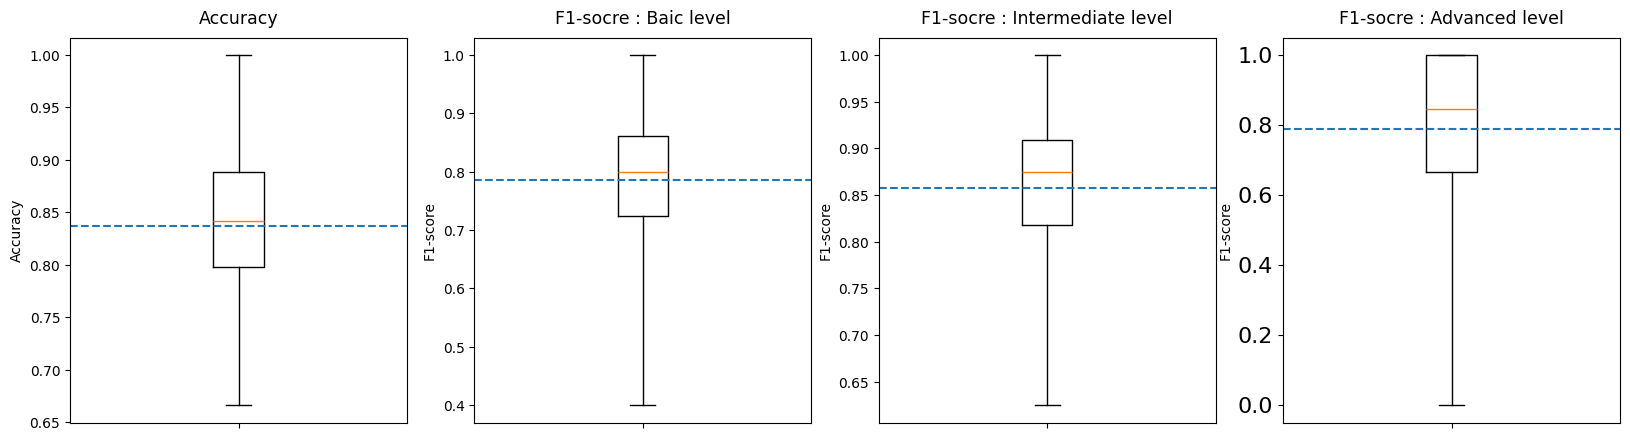

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize = (20, 5))


for i, key in enumerate(metrics_dict.keys()):
  list_ = metrics_dict[key]
  ax[i].boxplot(list_,  whis = 3
      # ,  color = colors[1]
      # ,  edgecolor = 'black'
        ) # hist type

  ax[i].set_title(key, # add title
               fontsize = 12.5,
               pad = 10,
               loc = 'center')
  ax[i].set_ylabel(title_list[i], # add y-axis label
                )

  ax[i].axhline(np.mean(list_), # add vertical line
            color = colors[0],
            linestyle = '--',
            linewidth = 1.5)
  
  ax[i].set_xticklabels([])

plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
# fig.text(0.55, 0.82, fontsize = 10,  s=f'Mean Accuracy : {round(np.mean(acc_list), 2)}%') #
# plt.tight_layout()    
# plt.savefig(f"{fig_path}Data_Fig5.png", dpi=300, bbox_inches='tight')
# plt.show();


In [12]:
metrics_dict = dict()
metrics_dict['Accuracy'] = metrics_acc
metrics_dict['F1-socre'] = metrics_f1
title_list = ['Accuracy', 'F1-score (weighted)']


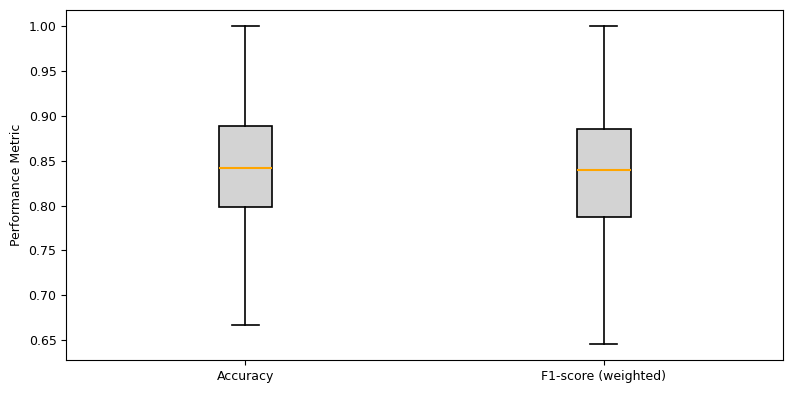

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (8, 4))


# for i, key in enumerate(metrics_dict.keys()):
#   list_ = metrics_dict[key]
ax.boxplot([metrics_acc, metrics_f1],   whis = 3,
            patch_artist=True,
           boxprops=dict(linewidth=1.2, facecolor='lightgray'),
           medianprops=dict(color='orange', linewidth=1.5),
           whiskerprops=dict(linewidth=1.2),
           capprops=dict(linewidth=1.2))

plt.rcParams['font.size'] = 9
ax.set_xticklabels(title_list)
ax.set_ylabel("Performance Metric")
ax.set_xlabel("")  # X축 제목 제거 (깔끔하게)
plt.tight_layout()    
plt.savefig(f"{fig_path}SI_2.A.4_Fig5.png", dpi=300, bbox_inches='tight')
# plt.show();
